# Recap. Свёрточные нейронные сети

## Мотивация
![](https://adeshpande3.github.io/assets/Cover2nd.png)

## Свёрточные нейросети. Как это работает
![](https://adeshpande3.github.io/assets/Stride1.png)
![](https://adeshpande3.github.io/assets/Stride2.png)
![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196)

## Свёрточные нейросети. Padding
![](https://adeshpande3.github.io/assets/Pad.png)

## Свёрточные нейросети. Feature Maps
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-05-at-11-03-00-pm.png?w=342&h=562)
![](https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif?w=748)
![](https://qph.ec.quoracdn.net/main-qimg-33b7d728b31f7f79ab2485e95eeb1296-c)

## Свёрточные нейросети. Pooling
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=494)
![](https://cdn-images-1.medium.com/max/1000/1*mModSYik9cD9XJNemdTraw.png)

## Свёрточные нейросети. Правило понижения размерности и reception field
![](https://cdn-images-1.medium.com/max/800/1*D47ER7IArwPv69k3O_1nqQ.png)

## Свёрточные нейронные сети. Применение

![](https://ujwlkarn.files.wordpress.com/2016/08/car.png?w=606)

## Практика

In [1]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras import backend as K

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 99, in init_dev
    **args)
  File "pygp

In [2]:
from keras.optimizers import SGD

Загрузите архив [отсюда](https://github.com/lucastheis/deepbelief/blob/master/data/mnist.npz)

In [3]:
import numpy as np
mnist = np.load('mnist.npz')
X_train, y_train, X_test, y_test = mnist['train'].transpose(), mnist['train_labels'].transpose(), mnist['test'].transpose(), mnist['test_labels'].transpose()
n_train, n_test = X_train.shape[0], X_test.shape[0]
X_train, X_test = X_train.reshape(n_train, 28, 28), X_test.reshape(n_test, 28, 28) # преобразуем тензор картинок к виду [число объектов, ширина, высота]

n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

(60000, 10000, 28, 28)

## Готовим данные
Есть некоторые заморочки связанные с тем, в каком виде должны быть данные

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
img_rows, img_cols = 28, 28

if K.image_dim_ordering() != 'tf': # смотрим, в каком порядке идут размерности картинок в движке. В некоторых движках ширина и высота картинки идут последними двумя измерениями, в некоторых - первыми
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [7]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # преобразуем пиксели к масштабу [0,1]
X_test /= 255


# numbers 0-9, so ten classes
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[0].shape

(28, 28, 1)

(<matplotlib.image.AxesImage at 0x7fc524a852b0>,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

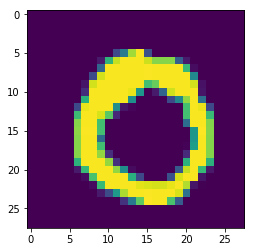

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[5][:, :, 0]), y_train[5]

In [11]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Составляем модель

In [12]:
# Количество конволюционных фильтров
n_filters = 32

# Размер фильра
n_conv = 3

# Размер пуллинга
n_pool = 2

# Размерность входной картинки
input_shape = (28, 28, 1)

model = Sequential()
model.add(Convolution2D( 
        n_filters, n_conv, n_conv,
        border_mode='valid',
        input_shape=input_shape,
        activation='relu'
))

# Конволюция
model.add(Convolution2D(n_filters, n_conv, n_conv, activation='relu'))

# Пуллинг
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

# Выравниваем
model.add(Flatten())

# Делаем полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Softmax в конце
model.add(Dense(n_classes, activation='softmax'))

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
model.fit(X_train,
          y_train,
          batch_size=32,
          nb_epoch=10,
          validation_data=(X_test, y_test),
          verbose=1)

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
14016/60000 [======>.......................] - ETA: 2:26 - loss: 0.4546 - acc: 0.8618

KeyboardInterrupt: 

## Внутри модели

In [15]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

Layer 0 	 conv2d_1 		 (None, 28, 28, 1) 	 (None, 26, 26, 32)
Layer 1 	 conv2d_2 		 (None, 26, 26, 32) 	 (None, 24, 24, 32)
Layer 2 	 max_pooling2d_1 		 (None, 24, 24, 32) 	 (None, 12, 12, 32)
Layer 3 	 dropout_1 		 (None, 12, 12, 32) 	 (None, 12, 12, 32)
Layer 4 	 flatten_1 		 (None, 12, 12, 32) 	 (None, 4608)
Layer 5 	 dense_1 		 (None, 4608) 	 (None, 128)
Layer 6 	 dropout_2 		 (None, 128) 	 (None, 128)
Layer 7 	 dense_2 		 (None, 128) 	 (None, 10)


In [16]:
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("Layer", i, "\t", layer.name, "\t\t", W.shape, "\t", b.shape)

Layer 0 	 conv2d_1 		 (3, 3, 1, 32) 	 (32,)
Layer 1 	 conv2d_2 		 (3, 3, 32, 32) 	 (32,)
Layer 5 	 dense_1 		 (4608, 128) 	 (128,)
Layer 7 	 dense_2 		 (128, 10) 	 (10,)


## Цветные картинки

In [17]:
from keras.datasets import cifar10
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

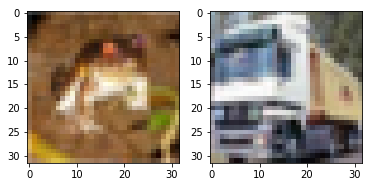

In [23]:
plt.subplot(121)
plt.imshow(X_train[0])
plt.subplot(122)
plt.imshow(X_train[1])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

generated_images = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

generated_images.fit(X_train)

In [19]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

BATCH_SIZE = 400
NB_EPOCHES = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(generated_images.flow(X_train, Y_train,
                                 batch_size=BATCH_SIZE),
                    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(BATCH_SIZE))),
                    epochs=NB_EPOCHES,
                    validation_data=(X_test, Y_test),
                    workers=4, verbose=1)

Epoch 1/10
  6/125 [>.............................] - ETA: 7:15 - loss: 2.3061 - acc: 0.1158

KeyboardInterrupt: 

## Свёрточные сети. Виды
![](https://adeshpande3.github.io/assets/Localization.png)
![](https://adeshpande3.github.io/assets/Detection.png)


# Recap. Рекуррентные нейронные сети

## Мотивация
Люди не начинают думать с чистого листа каждую секунду. Например, читая текст, вы понимаете каждое слово, основываясь на понимании предыдущего слова. Мы не выбрасываем из головы все и не начинаем думать с нуля. Наши мысли обладают постоянством и хранят предшествовавший контекст

**Пример:**

Облака плывут по (???)

**Ответ:** *небу*

![](https://hsto.org/web/5f3/60f/ec1/5f360fec1bc24f9f973f7d1d3bded6c6.jpg)

Нейросети долгое время этим свойством не обладали. Например, до этого эмоциональная окраска определялась по отдельным словам, а не предшествовавшему им контексту

**Сеть Элмана:**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/983c33bfddb6c6d8b1bfdf9accf50bb5634e2f5a)
**Сеть Джордана:**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/5afd2ce28a08315b805d6399709e7e6208b6f5d8)

**Вот так это выглядит:**
![](https://hsto.org/web/5c8/0fa/c22/5c80fac224d449209d888d18ea1111a8.png)

## Проблема долгих зависимостей. LSTM
**Пример:**

Я вырос во Франции… Я бегло говорю по-(???)

**Ответ:** *французски*

## Идея
<center>**RNN**</center>

![](https://hsto.org/web/47d/ee6/2c3/47dee62c3af8498c946befa1f3330d90.png)

<center>**LSTM**</center>

![](https://hsto.org/web/67b/04f/73b/67b04f73b4c34ba38edfa207e09de07c.png)

## LSTM. Этапы
![](https://hsto.org/web/a5f/31a/104/a5f31a104b184217aca105de9ab6d320.png)
![](https://hsto.org/web/248/bf4/a75/248bf4a75ab74bf180b9c0e2e2cc5a58.png)
![](https://hsto.org/web/30e/ffa/7f9/30effa7f98274deaa65cf2e293f18365.png)
![](https://hsto.org/web/16d/5b5/783/16d5b5783ba34244afcf0f240133fb28.png)

## Нейронные машины Тьюринга
![](https://hsto.org/getpro/habr/post_images/03f/9bd/bb2/03f9bdbb23587fddd2c7f7b2635b3087.png)

## Этапы. Чтение
\begin{align} \tag{1} &0 \leq w_t(i) \leq 1 \\ &\sum\limits_{i=1}^R w_t(i) = 1 \end{align}
\begin{align} \tag{2} r_t \leftarrow \sum\limits_i^R w_t(i) \mathcal{M}_t(i) \end{align}

## Этапы. Запись
\begin{align} \tag{3} \mathcal{M}_t^{erased}(i) \leftarrow \mathcal{M}_{t-1}(i)[\mathbf{1} - w_t(i) e_t ] \end{align}
\begin{align} \tag{4} \mathcal{M}_t(i) \leftarrow \mathcal{M}_t^{erased}(i) + w_t(i) a_t \end{align}

## Этапы. Адресация

### Адресация. Этап 1. Адресация по содержанию
![](https://hsto.org/getpro/habr/post_images/961/d9c/131/961d9c131d8a872a3a39afe0b6931737.png)

\begin{align} \tag{6} K(u, v) = \frac{u \cdot v}{\|u\| \cdot \|v\|} \end{align}
\begin{align} \tag{5} w_t^c(i) = \frac{exp\Big(\beta_t K (k_t, M_t(i))\Big)}{\sum_j exp\Big(\beta_t K(k_t, M_t(j))\Big)} \end{align}
![](https://hsto.org/getpro/habr/post_images/e18/8df/941/e188df941e913312a7f4fca6cb065796.png)

### Адресация. Этап 2. Обновление весов из предыдущего состояния. Интерполяция
\begin{align} \tag{7} w_t^g \leftarrow g_t w_t^c + (1- g_t) w_{t-1} \end{align}
![](https://hsto.org/getpro/habr/post_images/c01/46f/f0a/c0146ff0a49a82ea245b04abd7b92a31.png)

### Адресация. Этап 3. Свёртка
\begin{align} \tag{8} \tilde{w}_t(i) \leftarrow \sum\limits_{j=0}^{R-1} w_t^g(j) s_t(i-j) \end{align}
![](https://hsto.org/getpro/habr/post_images/593/e25/526/593e25526d551db6db5aa01fa73d95dd.png)

### Адресация. Этап 4. Уточнение (sharpering)
\begin{align} \tag{9} w_t(i) \leftarrow \frac{\tilde{w}_t(i)^{\gamma_t}}{\sum\limits_j \tilde{w}_t(j)^{\gamma_t}} \end{align}
![](https://hsto.org/getpro/habr/post_images/3c2/2d7/b34/3c22d7b34c8b624dc439cfcf396290bf.png)

## Нейронные машины Тьюринга. Результат
![](https://hsto.org/getpro/habr/post_images/ee8/a43/cd4/ee8a43cd481219be030d43eed8c1f171.png)